# Part I - ( Ford Go Bike )
## by (Dauda olawale Kolawole)

## Introduction
> This data set information was produced from Ford GoBike System the information in it talked about individual rides that were made in a bike-sharing system for covering San Francisco Bay area.

## Preliminary Wrangling


In [70]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [71]:
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [72]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [73]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [74]:
bike_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [75]:
bike_df.duplicated().sum()

0

### Problems 

> wrong type with columns like , start_time , end_time ,member_birth_year
> wrong type with all columns which have ids but it's ok we can igonre them i don't need them much 
> many nan values in different columns 


## Cleaning 

In [76]:
df = bike_df.copy()

In [77]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [78]:
df['start_date'] =pd.to_datetime(df.start_time.dt.strftime('%Y-%m-%d'))
df['start_hourofday'] = (df.start_time.dt.strftime('%H')).astype(int)
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

In [79]:
df['end_date'] = pd.to_datetime(df.end_time.dt.strftime('%Y-%m-%d'))
df['end_hourofday'] = (df.end_time.dt.strftime('%H')).astype(int)
df['end_dayofweek'] = df.end_time.dt.strftime('%A')
df['end_month'] = df.end_time.dt.strftime('%B')

In [80]:
df['duration_minute'] = (df['duration_sec']/60).astype(int)

In [81]:
df['member_age'] = 2019 - df['member_birth_year']

In [82]:
df.drop(['duration_sec','start_time','end_time','start_station_id','start_station_latitude','start_station_longitude',
         'end_station_id','end_station_latitude', 'end_station_longitude','member_birth_year'],axis =1 , inplace = True)

In [83]:
df.dropna( inplace = True)

In [84]:
df['member_age'] = df['member_age'].astype(int)
df['bike_id'] = df['bike_id'].astype('str')

In [85]:
df.head()

,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_dayofweek,start_month,end_date,end_hourofday,end_dayofweek,end_month,duration_minute,member_age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,2019-02-28,17,Thursday,February,2019-03-01,8,Friday,March,869,35
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2019-02-28,12,Thursday,February,2019-03-01,5,Friday,March,1030,47
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,2019-02-28,17,Thursday,February,2019-03-01,4,Friday,March,608,30
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March,26,45
5,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,No,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March,29,60


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null datetime64[ns]
start_hourofday            174952 non-null int64
start_dayofweek            174952 non-null object
start_month                174952 non-null object
end_date                   174952 non-null datetime64[ns]
end_hourofday              174952 non-null int64
end_dayofweek              174952 non-null object
end_month                  174952 non-null object
duration_minute            174952 non-null int64
member_age                 174952 non-null int64
dtypes: datetime64[ns](2), int64(4), object(10)
memory usage: 22.7+ MB


In [87]:
df.describe()

,start_hourofday,end_hourofday,duration_minute,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,13.456165,13.609533,11.241461,34.196865
std,4.734282,4.748029,27.371269,10.118731
min,0.000000,0.000000,1.000000,18.000000
25%,9.000000,9.000000,5.000000,27.000000
50%,14.000000,14.000000,8.000000,32.000000
75%,17.000000,18.000000,13.000000,39.000000
max,23.000000,23.000000,1409.000000,141.000000


In [88]:
df = df[df['member_age']<80]

In [89]:
df.shape

(174749, 16)

### What is the structure of your dataset?

> There are 174719 rows for Ford GoBike System in a bike-sharing system wich covering the greater San Francisco Bay area, with 16 features, including 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip', 'start_date','start_hourofday', 'start_dayofweek', 'start_month', 'end_date','end_hourofday', 
'end_dayofweek', 'end_month', 'duration_minute','member_age'

### What is/are the main feature(s) of interest in your dataset?

> all columns that represent time and info like age and customer type 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> time columns 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### How many bikes in dataset and what is the most ones use ?

In [90]:
len(df['bike_id'].unique())

4607

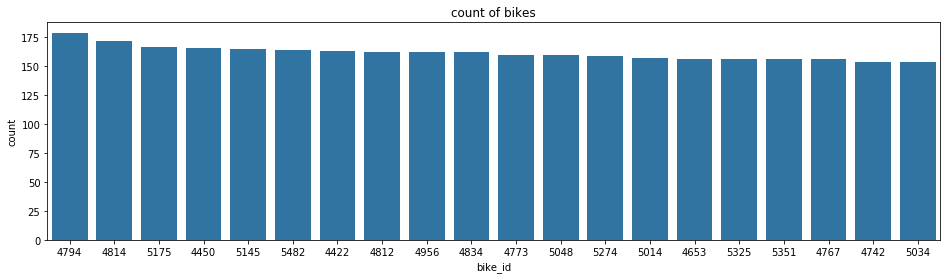

In [91]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(16,4))
bikes = df['bike_id'].value_counts()[:20].index
sb.countplot(data=df, x='bike_id', color=base_color, order =bikes)
plt.title("count of bikes");

- ther's  4607 bike in the data set the most one is used id bike with id 4794 

### whta is the busy start station name that have many orders ?

In [92]:
len(df['start_station_name'].unique())

329

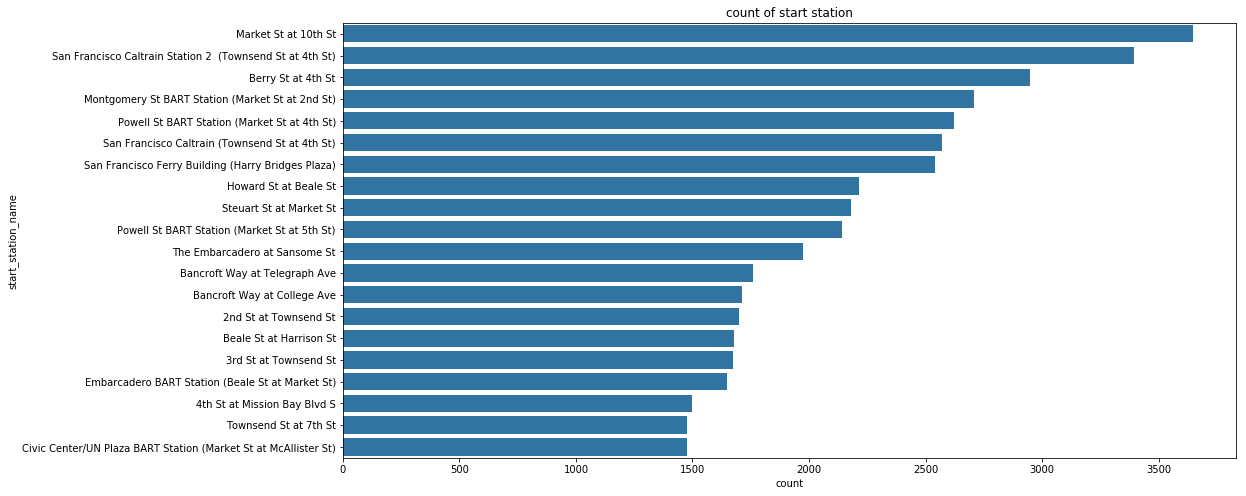

In [93]:
plt.figure(figsize=(16,8))
stations = df['start_station_name'].value_counts()[:20].index
sb.countplot(data=df, y='start_station_name', color=base_color, order =stations)
plt.title("count of start station");

- ther's  329 start station , the most one isMarket St at 10th St

### whta is the busy end station name that have many orders ?

In [94]:
len(df['end_station_name'].unique())

329

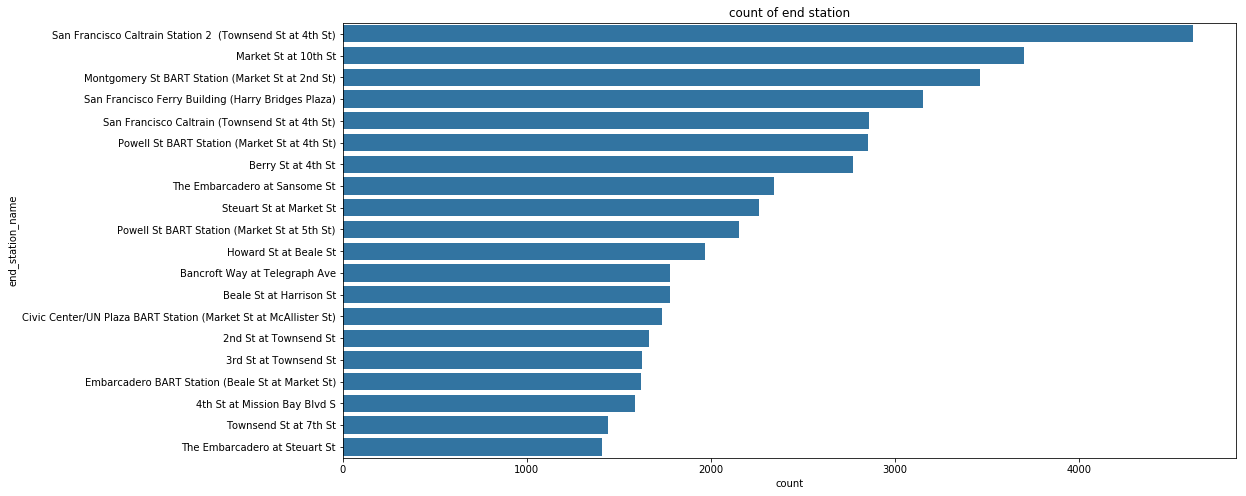

In [95]:
plt.figure(figsize=(16,8))
stations = df['end_station_name'].value_counts()[:20].index
sb.countplot(data=df, y='end_station_name', color=base_color, order =stations)
plt.title("count of end station");

- ther's  329 end station , the most one is San Francisco
- it is seem that  Market St at 10th St satation &  San Francisco is the most important station they have the biggest count in the start and the end 

## What is the ditripution of user type ?

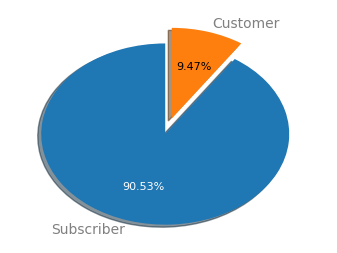

In [96]:
values = df.user_type.value_counts()
labels = values.index
fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0.09, 0.09)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

- Most of the users of are subscribers

### which  gender uses bikes the most ?

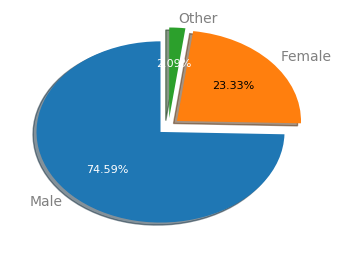

In [97]:
values = df.member_gender.value_counts()
labels = values.index
fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0.09, 0.09,0.09)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

- Most of the users are male.

###  What is the distripution of  start hour of day ?

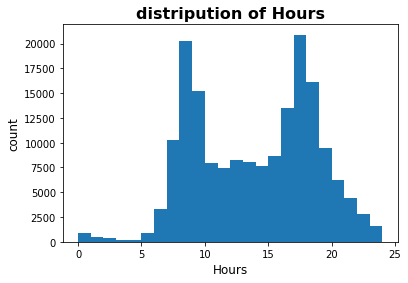

In [98]:
bins = np.arange(0,25, 1)
plt.hist(data = df, x = 'start_hourofday', bins = bins)
plt.xlabel('Hours',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('distripution of Hours', fontsize=16, fontweight='bold');

- The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

### what is the most day have usage of bikes ?

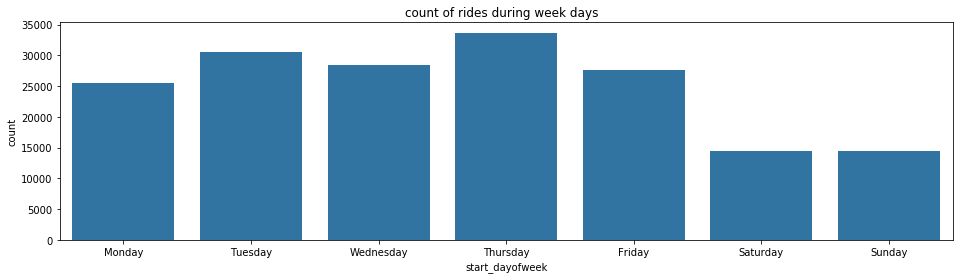

In [99]:
plt.figure(figsize=(16,4))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df, x='start_dayofweek', color=base_color, order =days)
plt.title("count of rides during week days  ");

- Tuesdays and Wednesdays are the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers , saturday and sunday are not popular as the rest of days.

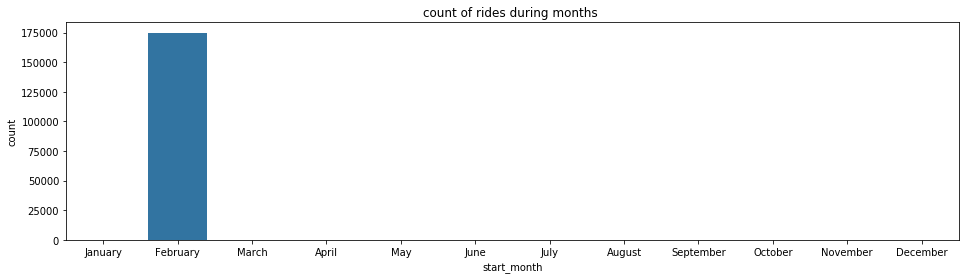

In [100]:
plt.figure(figsize=(16,4))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']
sb.countplot(data=df, x='start_month', color=base_color, order = months)
plt.title("count of rides during months ");

> all trips were in only February 

### What is the distripution of duration ?

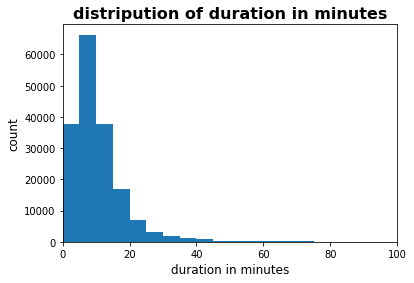

In [101]:
bins = np.arange(0,df['duration_minute'].max()+5, 5)
plt.hist(data = df, x = 'duration_minute', bins = bins)
plt.xlim(0, 100)
plt.xlabel('duration in minutes',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('distripution of duration in minutes', fontsize=16, fontweight='bold');

- most of trips are less than 40 min. and there's many outliers in this distroipution 

### What is the distripution of duration ?

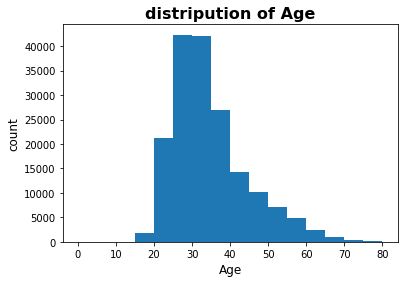

In [102]:
bins = np.arange(0,df['member_age'].max()+5, 5)
plt.hist(data = df, x = 'member_age', bins = bins)
plt.xlabel('Age',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('distripution of Age', fontsize=16, fontweight='bold');

-  all users  are above 20 and the mean is almost 35 

### observed in this part of the investigation.
>- ther's 4607 bike in the data set the most one is used id bike with id 4794

>- ther's 329 start station , the most one isMarket St at 10th St

>- ther's 329 end station , the most one is San Francisco

>- it is seem that Market St at 10th St satation & San Francisco is the most important station they have the biggest count in the start and the end

>- Most of the users of are subscribers

>- Most of the users are male.

>- he most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

>- Tuesdays and Wednesdays are the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers , saturday and sunday are not popular as the rest of days.

>- all trips were in only February

>- ost of trips are less than 40 min. and there's many outliers in this distroipution

>- all users are above 20 and the mean is almost 35

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [103]:
def mycountplot(df,xVar,hueVar, palette=None, order=None,hue_order=None):
    plt.figure(figsize=[14,6])
    sb.countplot(data=df, x=xVar, hue= hueVar,edgecolor='black',palette=palette, order= order, hue_order=hue_order);
    xVar=xVar.replace("-"," ")
    plt.title(f'''Distribution of {xVar} by {hueVar}'''.title(),fontsize=14, weight="bold")
    plt.xlabel(xVar.title(),fontsize=10, weight="bold")
    plt.ylabel('Frequency'.title(),fontsize=10, weight = "bold")
    sb.despine()

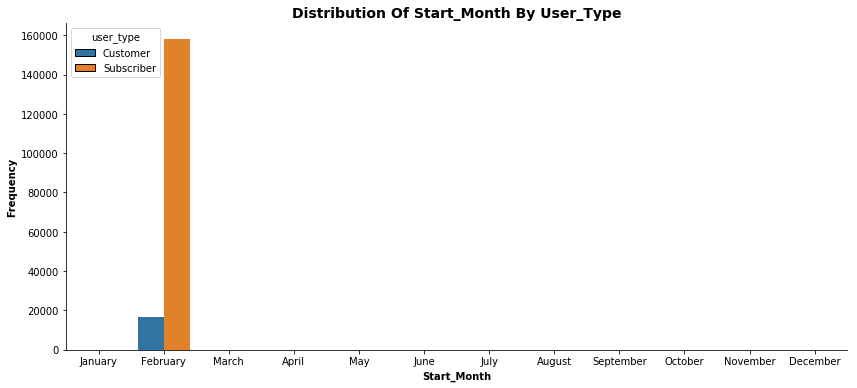

In [104]:

mycountplot(df,'start_month','user_type', order= months)

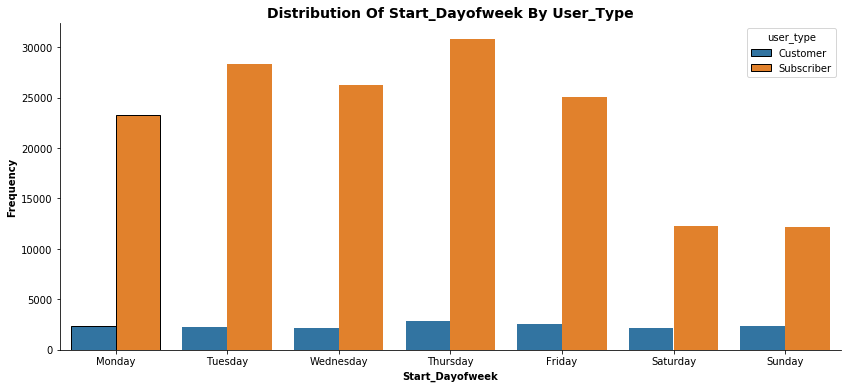

In [105]:
mycountplot(df,'start_dayofweek','user_type', order= days)

> Customer number is same during all the week , Tuesdays and Wednesdays are the most popular days for Subscriber 

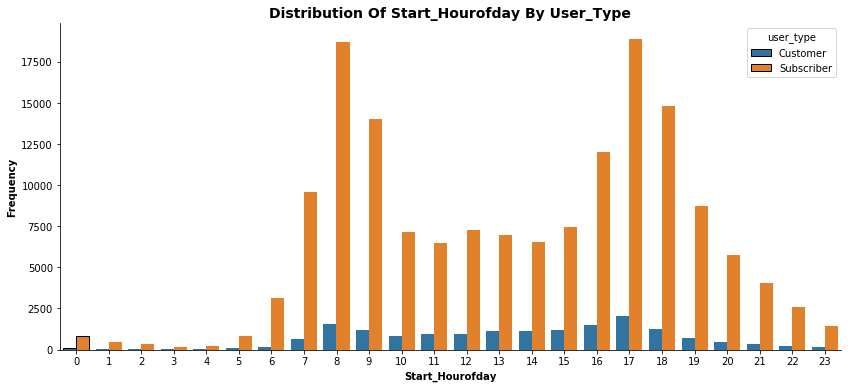

In [106]:

mycountplot(df,'start_hourofday','user_type')

> can say that Customer alomost donot use bike during night  , however Subscriber The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

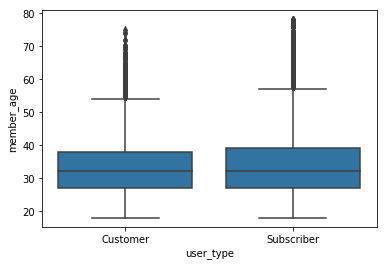

In [107]:
sb.boxplot(data=df, x='user_type', y='member_age', color=base_color);

> both types have the same mean of age 

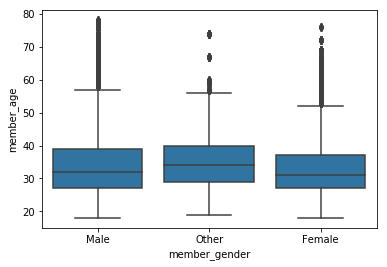

In [108]:
sb.boxplot(data=df, x='member_gender', y='member_age', color=base_color);

> male have wider range of age than other & Female

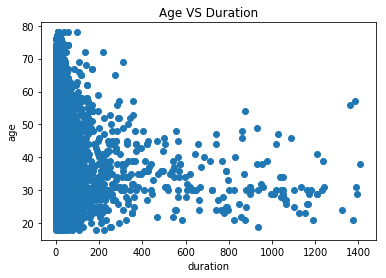

In [109]:
plt.scatter(data = df, y = 'member_age', x = 'duration_minute')
plt.ylabel('age')
plt.xlabel('duration')
plt.title("Age VS Duration");

> people with age less than 50 years have trip duration more than 200 min. 
> it is seem that the most duration is less than 200 and over that is outliers 

In [110]:
df1 = df[df["duration_minute"] <= 200]

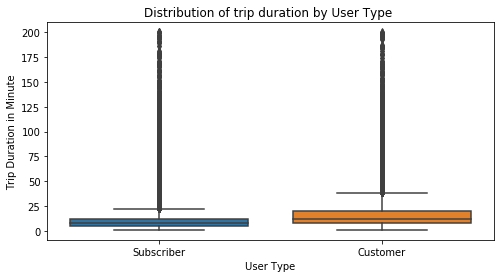

In [111]:
plt.figure(figsize = (8,4))
sb.boxplot(data = df1, x = "user_type", y = "duration_minute")
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Minute')
plt.title("Distribution of trip duration by User Type ")
plt.show()

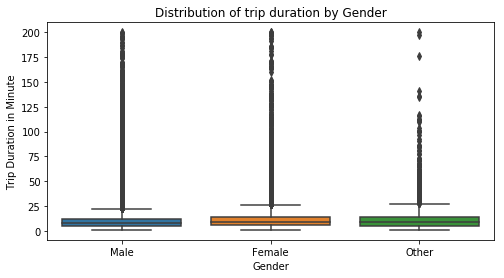

In [112]:
plt.figure(figsize = (8,4))
sb.boxplot(data = df1, x = "member_gender", y = "duration_minute")
plt.xlabel('Gender')
plt.ylabel('Trip Duration in Minute')
plt.title("Distribution of trip duration by Gender")
plt.show()

>  difference is not big to say sure which user type or gender make longest duration 

In [113]:
days=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

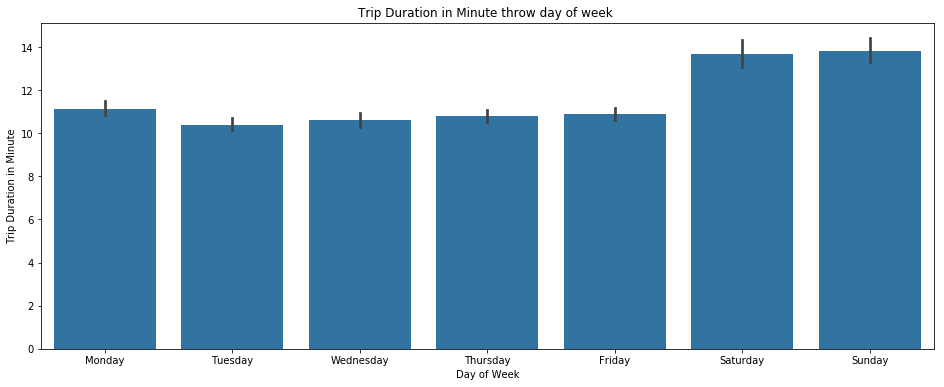

In [114]:
plt.figure(figsize = (16,6))
sb.barplot(data = df, x = "start_dayofweek", y = "duration_minute", color=base_color, order=days)
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Minute')
plt.title("Trip Duration in Minute throw day of week ")
plt.show()

>  Trip duration is longer during weekends, reflecting more casual and entertainment usage.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Customer number is same during all the week , Tuesdays and Wednesdays are the most popular days for Subscriber 

> - can say that Customer alomost donot use bike during night , however Subscriber The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

> - people with age less than 50 years have trip duration more than 200 min. 

> - it is seem that the most duration is less than 200 and over that is outliers 

>- both types have the same mean of age 

> - male have wider range of age than other & Female

>- Trip duration is longer during weekends, reflecting more casual and entertainment usage.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customer alomost donot use bike during night

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

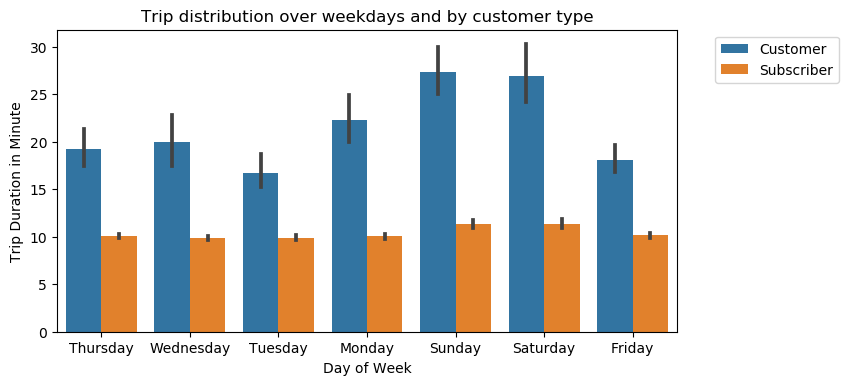

In [115]:
plt.figure(figsize = (8,4), dpi = 100)

sb.barplot(data = df, x = "start_dayofweek", y = "duration_minute", hue='user_type')
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Trip distribution over weekdays and by customer type");

> Customers have consistently longer trips across all days specially in sunday and saturday , Subscriber have the duration throw all the week   . 

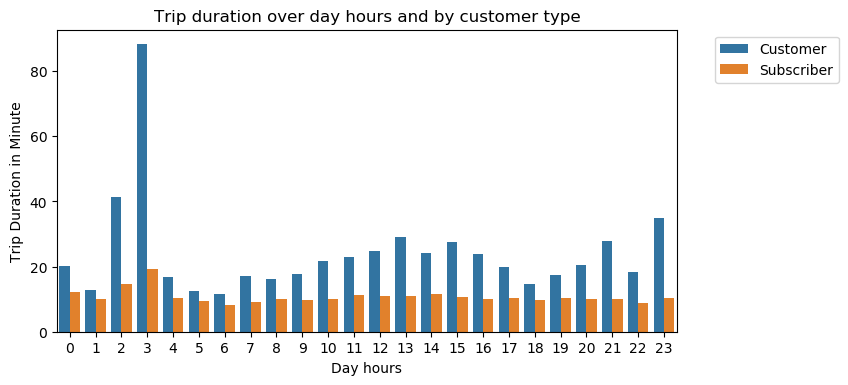

In [116]:
plt.figure(figsize = (8,4), dpi = 100)

sb.barplot(data = df, x = "start_hourofday", y = "duration_minute",   hue='user_type', ci = None)
plt.title("Trip duration over day hours and by customer type")
plt.xlabel('Day hours')
plt.ylabel('Trip Duration in Minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

> Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

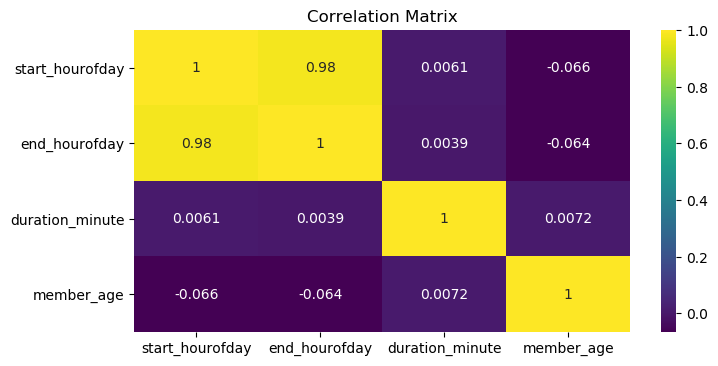

In [117]:
plt.figure(figsize = (8,4), dpi = 100)
sb.heatmap(df.corr(), cmap = "viridis", annot = True)
plt.title("Correlation Matrix")

plt.show()

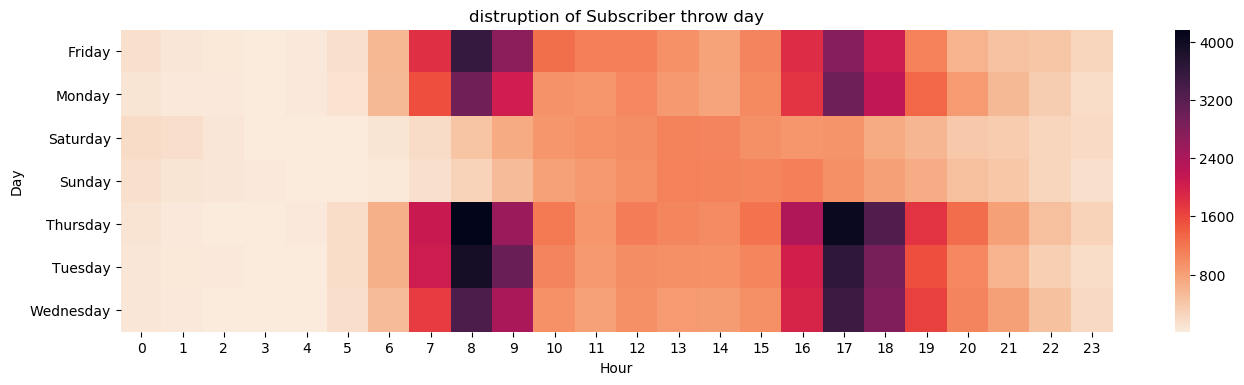

In [118]:
plt.figure(figsize = (16,4), dpi = 100)
customers = df[df['user_type'] == "Subscriber"] 
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('distruption of Subscriber throw day');
plt.xlabel('Hour');
plt.ylabel('Day');

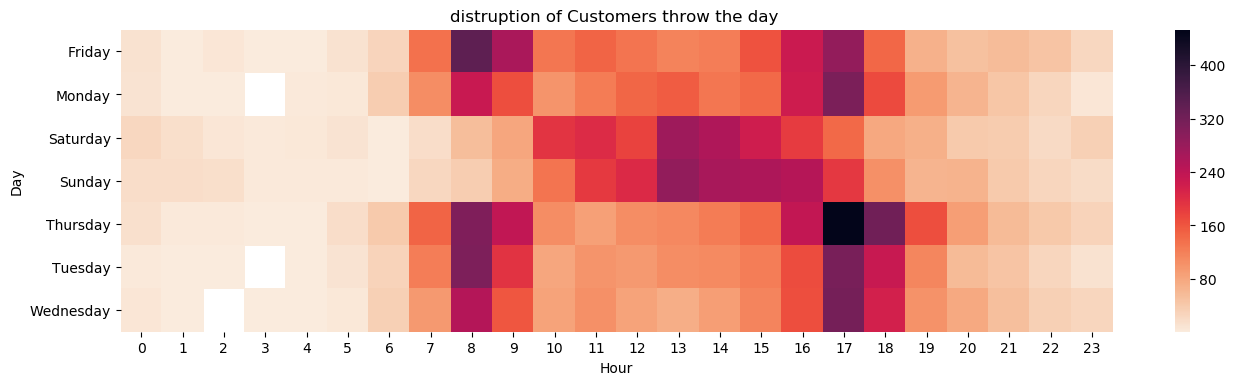

In [119]:
plt.figure(figsize = (16,4), dpi = 100)
customers = df[df['user_type'] == "Customer"] 
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('distruption of Customers throw the day ');
plt.xlabel('Hour');
plt.ylabel('Day');


> user types have different usage in hours and days 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>- Customers have consistently longer trips across all days specially in sunday and saturday , Subscriber have the duration throw all the week  

>- Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

>- user types have different usage in hours and days 


### Were there any interesting or surprising interactions between features?

> it is an so surprising thing that customer most trips are in night 

## Conclusions
> - Customer number is same during all the week , Tuesdays and Wednesdays are the most popular days for Subscriber 

> - can say that Customer alomost donot use bike during night , however Subscriber The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

> - people with age less than 50 years have trip duration more than 200 min. 

> - it is seem that the most duration is less than 200 and over that is outliers 

>- both types have the same mean of age 

> - male have wider range of age than other & Female

>- Trip duration is longer during weekends, reflecting more casual and entertainment usage.

>- Customers have consistently longer trips across all days specially in sunday and saturday , Subscriber have the duration throw all the week  

>- Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

>- user types have different usage in hours and days 




## limitation
>- We got missing data which we fix some of them .

>- We got Age outliers for for more than 100 .

